# Itroduction of dataset 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
#df.info() est une fonction de Pandas utilisée pour afficher des informations de base sur un DataFrame, 
#notamment les noms de chaque colonne, les types de données, le nombre de valeurs non nulles et l'utilisation de 
# la mémoire. Les résultats obtenus à partir de cette fonction peuvent nous aider à comprendre rapidement 
# l'état général d'un ensemble de données, notamment si les types de données sont corrects,
# s'il y a des valeurs manquantes ou des valeurs aberrantes, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

# Categorical Feature Analysis （Conversion des caractéristiques catégorielles en caractéristiques numériques） — one-hot

In [5]:
from sklearn.preprocessing import OneHotEncoder

# print les categories de la colonne 'CLASS'
print(df["class"].unique())

['GALAXY' 'QSO' 'STAR']


In [6]:

# Création d'objets de codage One-Hot
encoder = OneHotEncoder()


# Convertir la colonne "CLASS" en un tableau à deux dimensions
class_values = df["class"].values.reshape(-1, 1)


# Codage de la colonne "CLASS" en One-hot
class_one_hot = encoder.fit_transform(class_values).toarray()


# Convertir les données encodées en un DataFrame et définir les noms des colonnes en fonction des noms des catégories.
class_names = ["GALAXY", "QSO", "STAR"]
class_one_hot_df = pd.DataFrame(class_one_hot, columns=[f"class-{name}" for name in class_names])


# Lier les données encodées à l'ensemble de données original
df = pd.concat([df, class_one_hot_df], axis=1)


# Supprimer la colonne "CLASS" d'origine
df.drop("class", axis=1, inplace=True)


# Visualiser(print) l'ensemble des données encodées
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class-GALAXY,class-QSO,class-STAR
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,1.0,0.0,0.0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,1.0,0.0,0.0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,1.0,0.0,0.0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,1.0,0.0,0.0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,1.0,0.0,0.0


In [7]:

# Supprimer l'id car il s'agit d'une caractéristique non valide
df.drop("obj_ID", axis=1, inplace=True)
df.drop("run_ID", axis=1, inplace=True)
df.drop("rerun_ID", axis=1, inplace=True)
df.drop("cam_col", axis=1, inplace=True)
df.drop("field_ID", axis=1, inplace=True)
df.drop("spec_obj_ID", axis=1, inplace=True)
df.drop("fiber_ID", axis=1, inplace=True)
df.head()

,alpha,delta,u,g,r,i,z,redshift,plate,MJD,class-GALAXY,class-QSO,class-STAR
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,56354,1.0,0.0,0.0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,58158,1.0,0.0,0.0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,55592,1.0,0.0,0.0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,58039,1.0,0.0,0.0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,56187,1.0,0.0,0.0


In [8]:
from sklearn.preprocessing import StandardScaler


# Obtenir les noms des colonnes Non-class
non_class_columns = [col for col in df.columns if col not in [f"class-{name}" for name in class_names]]


# Normalisation des caractéristiques non-classe
scaler = StandardScaler()
df[non_class_columns] = scaler.fit_transform(df[non_class_columns])


# Print l'ensemble de données normalisé
print(df.head())

      alpha     delta         u         g         r         i         z  \
0 -0.434604  0.425529  0.059755  0.054926  0.403962  0.046007  0.003937   
1 -0.339921  0.363402  0.088045  0.072456  1.584406  1.185097  0.092835   
2 -0.367251  0.582713  0.103327  0.067165  0.519745  0.150019  0.008808   
3  1.669523 -1.249105  0.004921  0.102210  1.059904  0.807610  0.018321   
4  1.737310 -0.150242 -0.080055 -0.092948 -1.697421 -1.767887 -0.098468   

   redshift     plate       MJD  class-GALAXY  class-QSO  class-STAR  
0  0.079557  0.228633  0.423203           1.0        0.0         0.0  
1  0.277096  1.797924  1.420729           1.0        0.0         0.0  
2  0.092423 -0.190025  0.001854           1.0        0.0         0.0  
3  0.486770  1.358942  1.354927           1.0        0.0         0.0  
4 -0.630267  0.333297  0.330860           1.0        0.0         0.0  



Conclusion : le nombre de catégories dans l'ensemble de données n'est pas uniformément réparti. Les données doivent être divisées et sélectionnées.

In [9]:

# Détecter la présence de valeurs manquantes dans l'ensemble de données
missing_values = df.isnull()


# Supprimer les lignes contenant des valeurs manquantes
df = df.dropna()


# Print l'ensemble de données après avoir supprimé les valeurs manquantes
df.head()

,alpha,delta,u,g,r,i,z,redshift,plate,MJD,class-GALAXY,class-QSO,class-STAR
0,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,0.079557,0.228633,0.423203,1.0,0.0,0.0
1,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,0.277096,1.797924,1.420729,1.0,0.0,0.0
2,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,0.092423,-0.190025,0.001854,1.0,0.0,0.0
3,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,0.486770,1.358942,1.354927,1.0,0.0,0.0
4,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,-0.630267,0.333297,0.330860,1.0,0.0,0.0


# Dealing with ClassNumData Imbalancing 

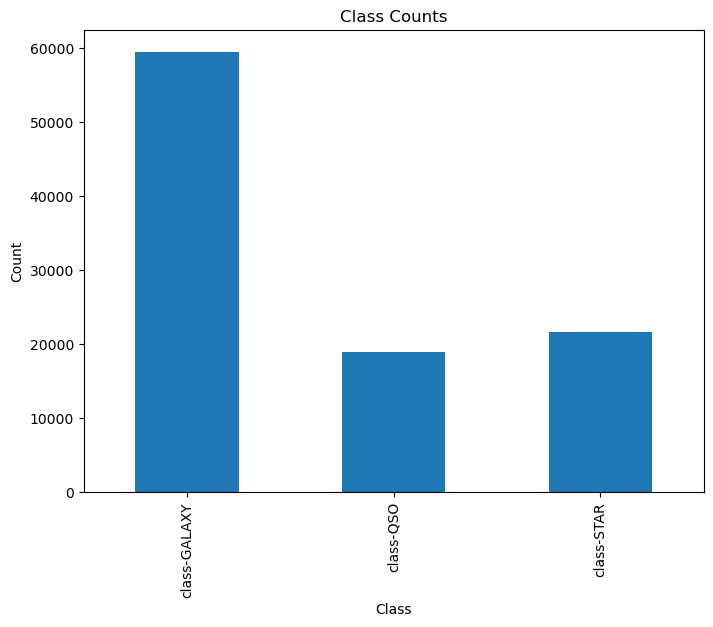

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Supposons que pca_df contienne l'ensemble des données traitées.


# Calculer le nombre total de chaque catégorie
class_counts = df.iloc[:, -3:].sum()


# Tracer des diagrammes à barres
fig, ax = plt.subplots(figsize=(8, 6))
class_counts.plot(kind="bar", ax=ax)
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Class Counts")
plt.show()

In [11]:

# Problèmes trouvés ! Quantité déséquilibrée de données dans trois classes

In [15]:
from imblearn.over_sampling import RandomOverSampler


# Diviser l'ensemble de données en matrices de caractéristiques et en variables cibles
X = df.drop(['class-GALAXY', 'class-QSO', 'class-STAR'], axis=1)
y = df[['class-GALAXY', 'class-QSO', 'class-STAR']]


# Convertir les variables cibles en tableaux NumPy
y = y.to_numpy()


# Créer un objet RandomOverSampler
oversampler = RandomOverSampler(random_state=42)


# Sur-échantillonnage（Over-sampling） de l'ensemble des données

X_over, y_over = oversampler.fit_resample(X, y)


# Convertir les données échantillonnées en DataFrame et ajouter les noms des colonnes
X_over_df = pd.DataFrame(X_over, columns=X.columns)
y_over_df = pd.DataFrame(y_over, columns=['class-GALAXY', 'class-QSO', 'class-STAR'])


# Combiner la matrice des caractéristiques et les variables cibles en un seul ensemble de données
df_over = pd.concat([X_over_df, y_over_df], axis=1)
df=df_over
df.head()

,alpha,delta,u,g,r,i,z,redshift,plate,MJD,class-GALAXY,class-QSO,class-STAR
0,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,0.079557,0.228633,0.423203,1,0,0
1,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,0.277096,1.797924,1.420729,1,0,0
2,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,0.092423,-0.190025,0.001854,1,0,0
3,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,0.486770,1.358942,1.354927,1,0,0
4,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,-0.630267,0.333297,0.330860,1,0,0


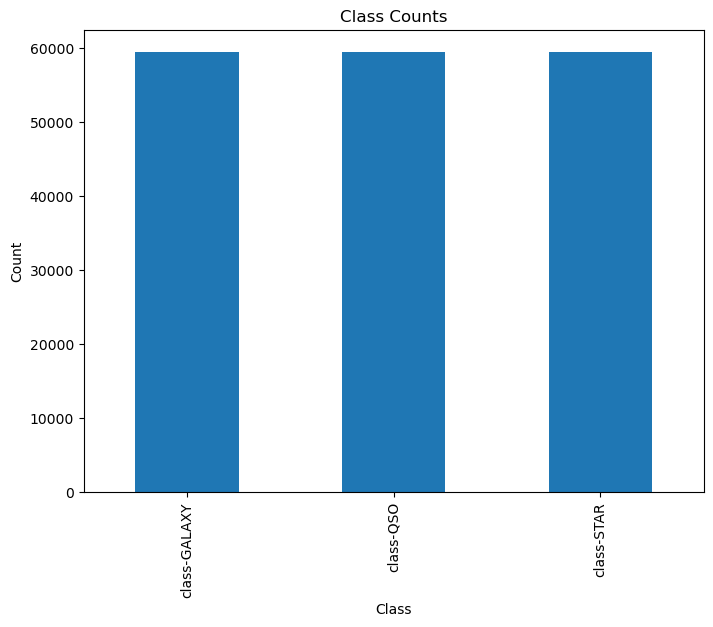

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


# Supposons que pca_df contienne l'ensemble des données traitées.


# Calculer le nombre total de chaque catégorie
under_sample_data= df.copy()
class_counts = under_sample_data.iloc[:, -3:].sum()


# Tracer des diagrammes à barres
fig, ax = plt.subplots(figsize=(8, 6))
class_counts.plot(kind="bar", ax=ax)
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Class Counts")
plt.show()

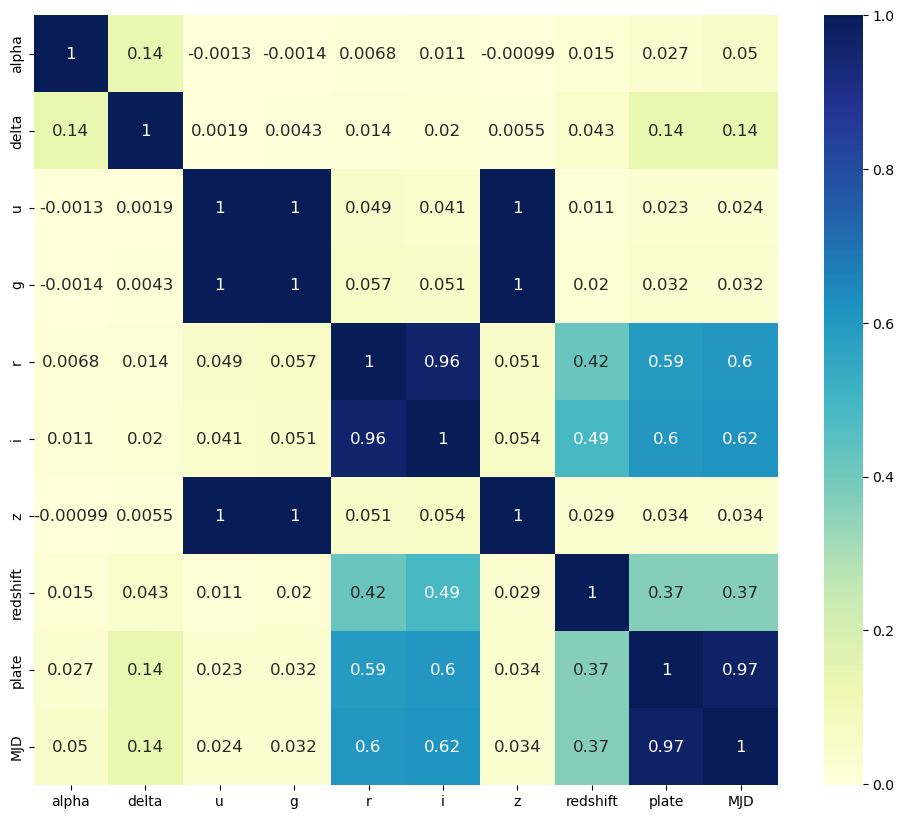

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


# Créer une copie de l'ensemble de données et supprimer la colonne "class".
df_copy = df.copy()
df_copy.drop(["class-GALAXY", "class-QSO", "class-STAR"], axis=1, inplace=True)


# Calculer le coefficient de corrélation entre les caractéristiques
corr_matrix = df_copy.corr()


# Créer un canevas avec plusieurs sous-dessins, redimensionner et résoudre les sous-dessins
fig, ax = plt.subplots(figsize=(12, 10), dpi=100)


# Carte thermique de la matrice des coefficients de corrélation, augmentation de la taille de la police du texte annoté
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", annot_kws={"fontsize": 12}, ax=ax)


# Ajouter la colonne "classe" à l'ensemble de données
class_cols = ["class-GALAXY", "class-QSO", "class-STAR"]
df_with_class = pd.concat([df_copy, df[class_cols]], axis=1)

df=df_with_class

# Afficher les graphiques
plt.show()



#Analyser la corrélation des caractéristiques individuelles Filtrer les caractéristiques à faible corrélation


Ce diagramme est une carte thermique de la matrice des coefficients de corrélation qui montre le degré de corrélation entre les caractéristiques individuelles. La couleur de la carte thermique représente l'ampleur du coefficient de corrélation, les couleurs plus foncées indiquant un coefficient de corrélation plus élevé et les couleurs plus claires un coefficient de corrélation plus faible.


Plus précisément, chaque ligne et chaque colonne représentent une caractéristique, et chaque élément de la matrice représente le coefficient de corrélation entre deux caractéristiques. Le coefficient de corrélation prend des valeurs comprises entre [-1, 1], où 1 indique une corrélation positive, -1 une corrélation négative et 0 une absence de corrélation.


Les carrés sur la diagonale de cette carte thermique représentent le coefficient de corrélation de chaque caractéristique elle-même, puisque chaque caractéristique doit avoir un coefficient de corrélation de 1 avec elle-même. Les moitiés supérieure et inférieure de la matrice sont symétriques, car les coefficients de corrélation entre les deux caractéristiques sont mutuels.


Grâce à cette carte thermique, nous pouvons rapidement comprendre le degré de corrélation entre les caractéristiques individuelles, ce qui facilite la sélection et l'ingénierie des caractéristiques. Par exemple, les caractéristiques présentant des coefficients de corrélation élevés peuvent être fusionnées ou supprimées afin d'éviter la redondance des caractéristiques et d'améliorer les performances du modèle.
Pour les coefficients de corrélation entre les caractéristiques, nous adoptons généralement l'approche suivante :



Corrélation positive (corrélation > 0) : si deux caractéristiques sont positivement corrélées, leurs valeurs augmentent ou diminuent généralement en même temps. Lors de la sélection des caractéristiques, si le coefficient de corrélation de deux caractéristiques est élevé, il faut envisager de les combiner en une seule caractéristique afin d'éviter la redondance des caractéristiques et d'améliorer les performances du modèle.


Corrélation négative (corrélation < 0) : si deux caractéristiques sont négativement corrélées, la valeur prise pour une caractéristique augmente et la valeur prise pour l'autre caractéristique diminue généralement. Lors de la sélection des caractéristiques, si le coefficient de corrélation de deux caractéristiques est élevé, il faut envisager de supprimer l'une des caractéristiques afin d'éviter la redondance des caractéristiques et d'améliorer les performances du modèle.


Non corrélé (corrélation = 0) : si deux caractéristiques ne sont pas corrélées, les modifications de leurs valeurs n'auront aucun effet l'une sur l'autre. Lors de la sélection des caractéristiques, si deux caractéristiques ont un coefficient de corrélation de 0, elles peuvent être retenues car elles peuvent toutes deux contribuer aux résultats de la prédiction du modèle.


Il est important de noter que l'analyse de corrélation n'est qu'une analyse préliminaire de la corrélation entre les caractéristiques et ne peut remplacer les étapes de sélection et d'ingénierie des caractéristiques. Lors de la sélection et de l'ingénierie des caractéristiques, d'autres facteurs doivent être pris en compte, tels que la quantité d'informations contenues dans les caractéristiques, la complexité entre les caractéristiques, etc.



In [18]:
# Effectuer une analyse en composantes principales 
# Supprimer les caractéristiques fortement corrélées
df.head()

,alpha,delta,u,g,r,i,z,redshift,plate,MJD,class-GALAXY,class-QSO,class-STAR
0,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,0.079557,0.228633,0.423203,1,0,0
1,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,0.277096,1.797924,1.420729,1,0,0
2,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,0.092423,-0.190025,0.001854,1,0,0
3,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,0.486770,1.358942,1.354927,1,0,0
4,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,-0.630267,0.333297,0.330860,1,0,0


# PCA Analyse en Composantes Principales

In [19]:
from sklearn.decomposition import PCA
import pandas as pd


# Créer une copie de l'ensemble de données et supprimer la colonne "class".
df_copy = df.copy()
df_copy.drop(["class-GALAXY", "class-QSO", "class-STAR"], axis=1, inplace=True)


# Créer un modèle PCA
pca = PCA(n_components=8)


# Réduction de la dimensionnalité de l'PCA pour les variables indépendantes
df_copy = pca.fit_transform(df_copy)


# Ajouter la colonne "classe" à l'ensemble de données
class_cols = ["class-GALAXY", "class-QSO", "class-STAR"]
df_class = df[class_cols].reset_index(drop=True)  # 将 "class" 列单独取出，并重置索引
df_pca = pd.DataFrame(data=df_copy, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])


# Splice df_pca and df_class into a new dataset 
df_with_class = pd.concat([df_pca, df_class], axis=1)
df = df_with_class
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,class-GALAXY,class-QSO,class-STAR
0,-0.326531,0.046854,-0.127009,-0.355192,-0.516380,0.145586,-0.307342,0.133123,1,0,0
1,-2.478009,0.797604,-0.383368,-1.193167,-0.216325,0.144360,-0.310132,-0.261930,1,0,0
2,-0.099495,-0.085490,-0.066105,-0.072339,-0.469322,0.648086,-0.315614,0.117500,1,0,0
3,-1.893958,0.659428,-0.415635,-0.342593,2.057108,-0.848039,-0.237659,-0.023283,1,0,0
4,1.677154,-0.457490,-1.655974,0.285916,0.791275,-1.984505,-0.088224,0.003455,1,0,0


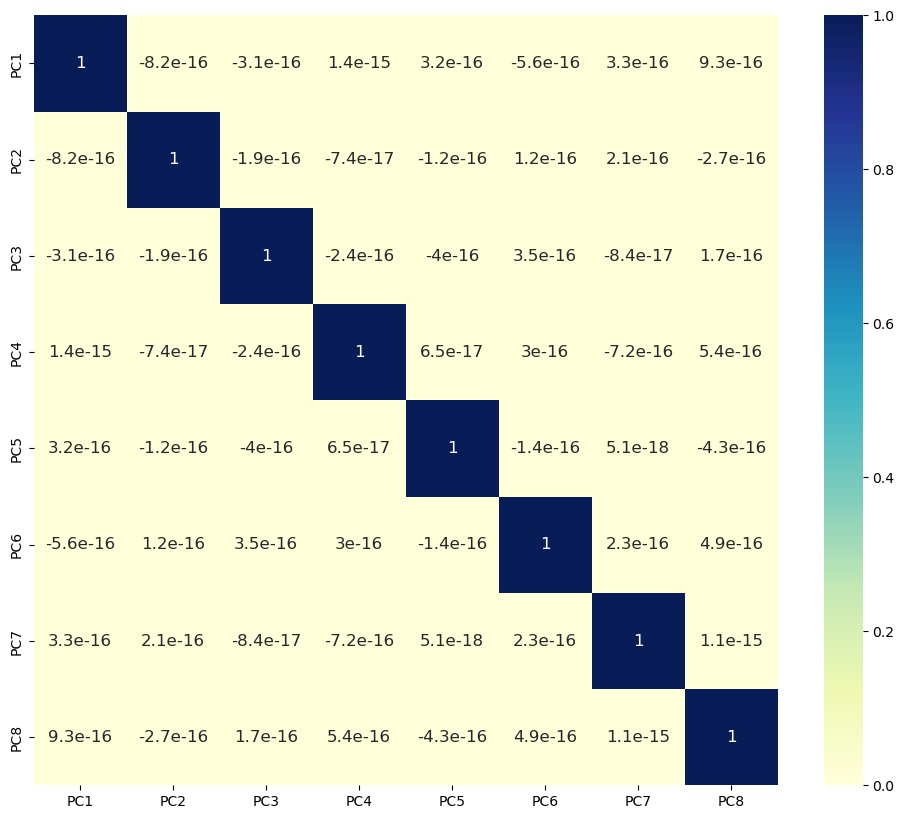

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


# Créer une copie de l'ensemble de données et supprimer la colonne "class".
df_copy = df.copy()
df_copy.drop(["class-GALAXY", "class-QSO", "class-STAR"], axis=1, inplace=True)


# Calculer le coefficient de corrélation entre les caractéristiques
corr_matrix = df_copy.corr()


# Créer un canevas avec plusieurs sous-dessins, redimensionner et résoudre les sous-dessins
fig, ax = plt.subplots(figsize=(12, 10), dpi=100)


# Carte thermique de la matrice des coefficients de corrélation, augmentation de la taille de la police du texte annoté
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", annot_kws={"fontsize": 12}, ax=ax)


# Ajouter la colonne "classe" à l'ensemble de données
class_cols = ["class-GALAXY", "class-QSO", "class-STAR"]
df_with_class = pd.concat([df_copy, df[class_cols]], axis=1)

df=df_with_class


# Afficher les graphiques
plt.show()


# En utilisant les deux premières composantes principales, represente les trois classes sur un diagramme de dispersion

In [21]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,class-GALAXY,class-QSO,class-STAR
0,-0.326531,0.046854,-0.127009,-0.355192,-0.516380,0.145586,-0.307342,0.133123,1,0,0
1,-2.478009,0.797604,-0.383368,-1.193167,-0.216325,0.144360,-0.310132,-0.261930,1,0,0
2,-0.099495,-0.085490,-0.066105,-0.072339,-0.469322,0.648086,-0.315614,0.117500,1,0,0
3,-1.893958,0.659428,-0.415635,-0.342593,2.057108,-0.848039,-0.237659,-0.023283,1,0,0
4,1.677154,-0.457490,-1.655974,0.285916,0.791275,-1.984505,-0.088224,0.003455,1,0,0


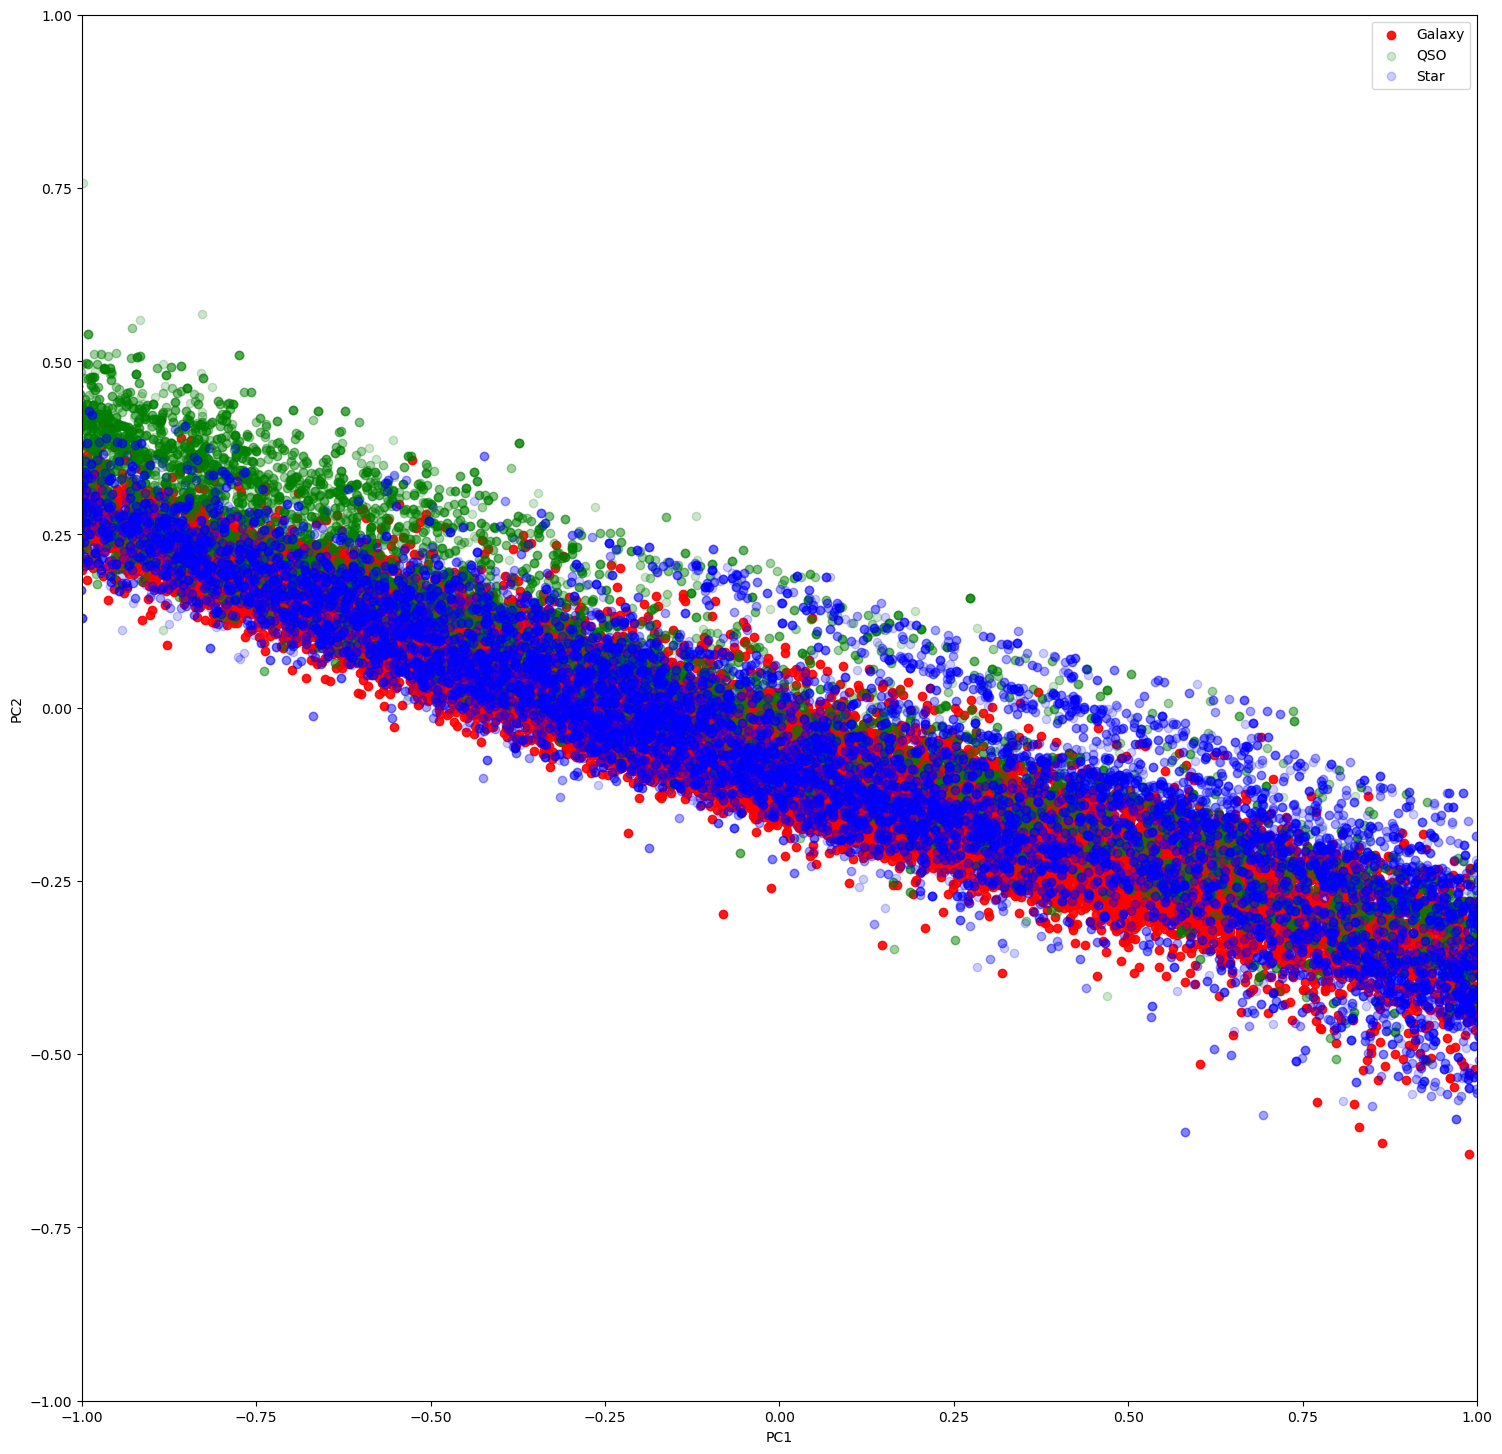

In [22]:
import matplotlib.pyplot as plt



# Diviser l'ensemble de données en trois sous-ensembles par catégorie
galaxy_df = df[df['class-GALAXY'] == 1]
qso_df = df[df['class-QSO'] == 1]
star_df = df[df['class-STAR'] == 1]


# Créer un graphe contenant des sous-graphes
fig, ax = plt.subplots(figsize=(18, 18))


# Dessiner le diagramme de dispersion ,alpha est la transparence
ax.scatter(galaxy_df['PC1'], galaxy_df['PC2'], color='red', label='Galaxy', alpha=0.9)
ax.scatter(qso_df['PC1'], qso_df['PC2'], color='green', label='QSO', alpha=0.2)
ax.scatter(star_df['PC1'], star_df['PC2'], color='blue', label='Star', alpha=0.2)


# Ajouter des légendes et des étiquettes
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')


# Définir la plage de l'axe
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)


# Afficher les images
plt.show()


import pandas as pd
import matplotlib.pyplot as plt


#Supposons que pca_df contienne l'ensemble des données traitées.


#Calculer le total pour chaque catégorie
under_sample_data= df.copy()
class_counts = under_sample_data.iloc[:, -3:].sum()


#Dessiner des diagrammes à barres
fig, ax = plt.subplots(figsize=(8, 6))
class_counts.plot(kind="bar", ax=ax)
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Class Counts")
plt.show()

# Train Test Split (Segmentation des données)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression



# Diviser l'ensemble de données en un ensemble d'apprentissage et un ensemble de test
X = df.drop(['class-GALAXY', 'class-QSO', 'class-STAR'], axis=1) # Matrice des caractéristiques
y = df['class-GALAXY'] # Variables cibles

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de formation

In [25]:

# Créer des modèles de régression logistique
lr = LogisticRegression()


# Évaluer les performances du modèle à l'aide de la validation croisée
scores = cross_val_score(lr, X_train, y_train, cv=5)


# Résultats de la validation croisée
print('Résultats de la validation croisée：', scores.mean())


# Modèles de formation
lr.fit(X_train, y_train)


# Évaluer la performance du modèle sur un ensemble de tests
test_score = lr.score(X_test, y_test)
print('Résultats de lensemble test：', test_score)

Résultats de la validation croisée： 0.7673619410200362
Résultats de lensemble test： 0.7681049709815796


# Courbe d'apprentissage

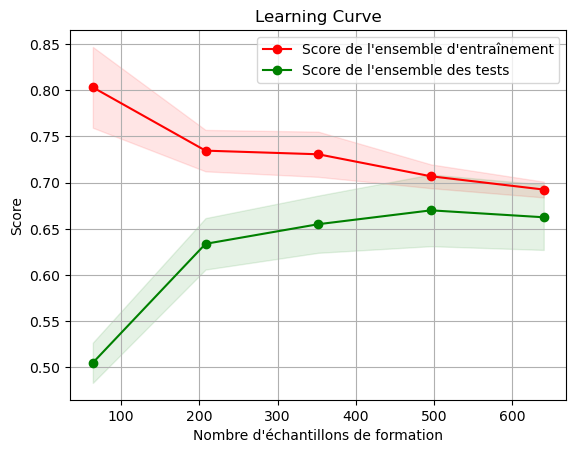

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    la courbe d'apprentissage
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Nombre d'échantillons de formation")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Score de l'ensemble d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Score de l'ensemble des tests")
    plt.legend(loc="best")
    return plt



# Générer un ensemble de données classifiées
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_classes=3, random_state=42)


# Diviser l'ensemble de données en un ensemble d'apprentissage et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Créer des modèles de régression logistique
lr = LogisticRegression()


# Tracer des courbes d'apprentissage
plot_learning_curve(lr, 'Learning Curve', X_train, y_train, cv=5)


#Nommer les courbes


# Afficher les images
plt.show()



La courbe rouge de ce tableau représente la tendance du score de l'ensemble d'entraînement avec l'augmentation du nombre d'échantillons d'entraînement et la courbe verte représente la tendance du score de l'ensemble de test avec l'augmentation du nombre d'échantillons d'entraînement. L'ensemble de données est censé être un ensemble de données de classification artificielle avec 1000 échantillons et 20 caractéristiques, dont 10 sont des caractéristiques informatives, divisées en 3 catégories. La courbe d'apprentissage peut être analysée de la manière suivante :

Le score de l'ensemble d'apprentissage augmente avec le nombre d'échantillons d'apprentissage, mais la courbe plafonne lorsque le nombre d'échantillons d'apprentissage atteint 500. Cela indique que les performances du modèle s'améliorent à mesure que les données d'apprentissage augmentent, mais qu'après un certain nombre, continuer à augmenter le nombre d'échantillons d'apprentissage n'améliore pas de manière significative les performances du modèle.

Le score de l'ensemble de test augmente avec le nombre d'échantillons d'entraînement, mais la courbe plafonne lorsque le nombre d'échantillons d'entraînement atteint 500. Cela indique que la capacité de généralisation du modèle s'améliore à mesure que les données d'entraînement augmentent, mais qu'à partir d'un certain nombre, continuer à augmenter le nombre d'échantillons d'entraînement n'améliore pas de manière significative la capacité de généralisation du modèle.

Le score de l'ensemble d'entraînement est toujours plus élevé que le score de l'ensemble de test, ce qui indique que le modèle est surajusté. Comme il s'agit d'un ensemble de données artificielles et que le nombre de caractéristiques est élevé, l'ajustement excessif est plus susceptible de se produire. Les méthodes permettant de remédier au surajustement comprennent l'augmentation de l'échantillon d'entraînement, la réduction du nombre de caractéristiques, la régularisation, etc.

In [27]:

# Facteur de pénalisation de la régularisation

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Créer un modèle de régression logistique avec régularisation L2
lr = LogisticRegression(penalty='l2', C=0.1)


# Créer des pipelines avec normalisation et régularisation L2
pipe_lr = make_pipeline(StandardScaler(), lr)


# Ajustement du modèle à l'ensemble d'apprentissage
pipe_lr.fit(X_train, y_train)


# Évaluer la performance du modèle sur un ensemble de tests
test_score = pipe_lr.score(X_test, y_test)
print('Score de lensemble des tests：', test_score)

Score de lensemble des tests： 0.75


C = 0.1, Score de lensemble des tests：0.75
C = 1, Score de lensemble des tests：0.745
C = 10, Score de lensemble des tests：0.745
C = 100, Score de lensemble des tests：0.745
C = 1000, Score de lensemble des tests：0.745


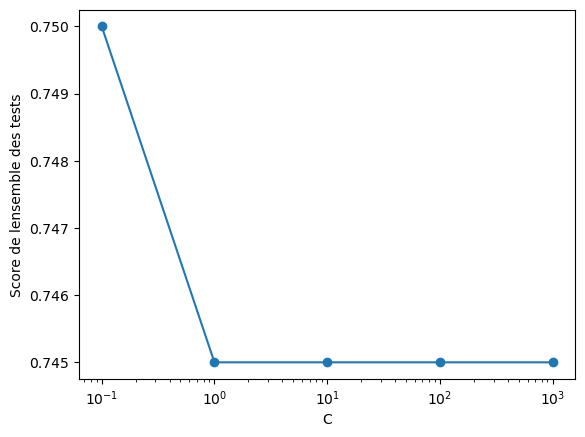

In [36]:
C_values = [0.1, 1, 10, 100, 1000]
test_scores = []


# Former des modèles de régression logistique pour différentes valeurs de C 
# et évaluer la performance des modèles sur un ensemble de tests.
for C in C_values:
    lr = LogisticRegression(penalty='l2', C=C)
    pipe_lr = make_pipeline(StandardScaler(), lr)
    pipe_lr.fit(X_train, y_train)
    test_score = pipe_lr.score(X_test, y_test)
    test_scores.append(test_score)
    print('C = {}, Score de lensemble des tests：{}'.format(C, test_score))


# Tracer les courbes de validation
plt.plot(C_values, test_scores, 'o-')
plt.xlabel('C')
plt.ylabel('Score de lensemble des tests')
plt.xscale('log')
plt.show()

# Confusion des modèles de test de preuve

In [37]:
from sklearn.metrics import confusion_matrix


# Prédire les résultats de la classification sur un ensemble de tests
y_pred = pipe_lr.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)


# Calculer des mesures telles que l'exactitude, la précision, le rappel
accuracy = np.trace(cm) / np.sum(cm)
precision = cm[1, 1] / np.sum(cm[:, 1])
recall = cm[1, 1] / np.sum(cm[1, :])
f1_score = 2 * precision * recall / (precision + recall)


# Imprimer la matrice de confusion et les indicateurs
print('matrice de confusion：')
print(cm)
print('Accuracy：', accuracy)
print('précision：', precision)
print('rappel：', recall)
print('F1-score:', f1_score)

matrice de confusion：
[[42 10  9]
 [16 62  3]
 [13  0 45]]
Accuracy： 0.745
précision： 0.8611111111111112
rappel： 0.7654320987654321
F1-score: 0.8104575163398693


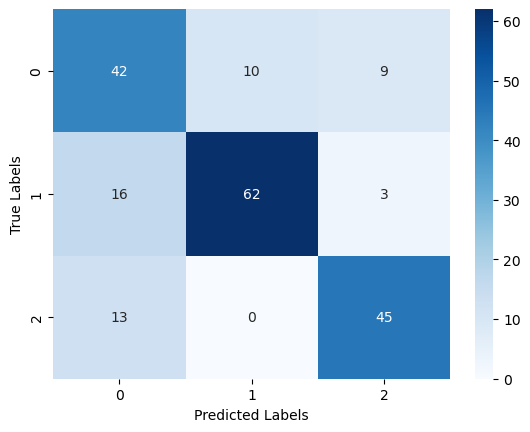

In [38]:
import seaborn as sns


# Carte thermique de la matrice de confusion
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




Dans le code ci-dessus, nous utilisons le paramètre annot=True pour afficher les nombres de la matrice sur la carte thermique et le paramètre cmap='Blues' pour définir la correspondance des couleurs. Le paramètre fmt='g' définit le format des nombres. Enfin, nous ajoutons des étiquettes au graphique à l'aide des fonctions xlabel() et ylabel() et nous affichons le graphique à l'aide de la fonction show().

Après avoir tracé la carte thermique, nous pouvons voir les performances du modèle de classification de manière plus visuelle, en particulier la relation entre les exemples vrais, faux positifs, vrais négatifs et faux négatifs. Plus la couleur de la carte thermique est foncée, plus le nombre d'échantillons relevant de cette classification est élevé. Lorsque l'on dessine une carte thermique d'une matrice de confusion, il est courant d'utiliser une grille rectangulaire de différentes couleurs pour indiquer la taille des différentes valeurs de la matrice, afin de donner une représentation plus visuelle des informations contenues dans la matrice. Dans cette carte thermique, la zone située dans le coin supérieur gauche est la plus sombre, car elle représente le plus grand nombre d'échantillons dans cette catégorie, tant pour l'étiquette vraie que pour l'étiquette prédite. Il s'agit généralement de l'une des régions les plus importantes de la matrice de confusion, car elle indique le nombre d'échantillons correctement identifiés par le classificateur

# ROC courbe


La courbe ROC est un graphique montrant la relation entre le taux de vrais positifs (TPR) et le taux de faux positifs (FPR) pour un modèle de classification binaire à différents seuils. Le TPR est la proportion d'échantillons réellement positifs et correctement prédits positifs par rapport au nombre total de cas positifs, c'est-à-dire TPR = TP / (TP + FN) ; le FPR est la proportion d'échantillons réellement négatifs mais incorrectement prédits positifs par rapport au nombre total de cas négatifs, c'est-à-dire FPR = FP / (FP + TN). la courbe ROC peut être utilisée pour mesurer la capacité de classification du modèle, et l'aire sous la courbe (AUC) peut refléter la précision de prédiction du modèle, plus la SSC est grande, plus la précision de classification du modèle est élevée.

Résultats de la validation croisée： 0.7673619410200362
test score： 0.7681049709815796


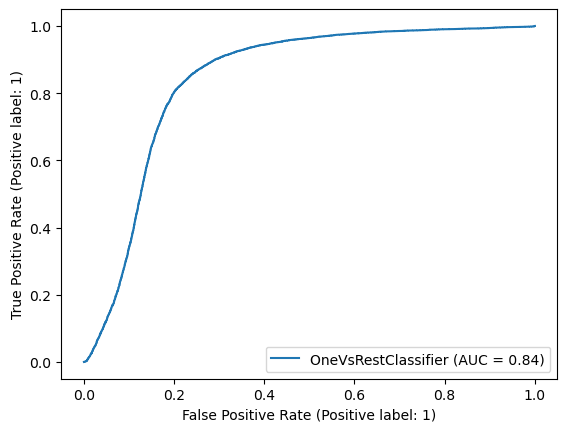

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

# Diviser l'ensemble de données en un ensemble d'apprentissage et un ensemble de test
X = df.drop(['class-GALAXY', 'class-QSO', 'class-STAR'], axis=1) # Matrice des caractéristiques
y = df['class-GALAXY'] # Variables cibles

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Créer des modèles de régression logistique
lr = LogisticRegression()


# Convertir les problèmes de multiclassification en problèmes de biclassification
clf = OneVsRestClassifier(lr)


# Évaluer les performances du modèle à l'aide de la validation croisée
scores = cross_val_score(clf, X_train, y_train, cv=5)


# Résultats de la validation croisée
print('Résultats de la validation croisée：', scores.mean())


# Modèles de formation
clf.fit(X_train, y_train)


# Évaluer la performance du modèle sur un ensemble de tests
test_score = clf.score(X_test, y_test)
print('test score：', test_score)


# Tracé des courbes ROC
plot_roc_curve(clf, X_test, y_test)
plt.show()



Pour le rappel, on peut utiliser les courbes de Recall-Precision ou les courbes de rappel-seuil. Ces courbes montrent la relation entre le rappel et la précision (ou le seuil).

Les courbes de Recall-Precision représentent la relation entre le rappel et la précision, le rappel étant l'axe des y de la courbe et la précision l'axe des x. La courbe montre le compromis entre le rappel et la précision. La courbe montre le compromis entre le rappel et la précision. Plus le rappel est élevé, plus la précision est faible, et vice versa. Si nous voulons que le rappel et la précision soient tous deux élevés, nous pouvons choisir le meilleur seuil sur la courbe.

La courbe rappel-seuil représente la relation entre le rappel et le seuil, le rappel étant l'axe y de la courbe et le seuil l'axe x de la courbe. La courbe montre le compromis entre le rappel et le seuil. Un seuil plus élevé se traduira par un rappel plus faible, tandis qu'un seuil plus faible se traduira par un rappel plus élevé. Si nous voulons que le rappel soit élevé, nous pouvons choisir le meilleur seuil sur la courbe.

# Essayez d'utiliser d'autres modèles：SVM

In [33]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,class-GALAXY,class-QSO,class-STAR
0,-0.326531,0.046854,-0.127009,-0.355192,-0.516380,0.145586,-0.307342,0.133123,1,0,0
1,-2.478009,0.797604,-0.383368,-1.193167,-0.216325,0.144360,-0.310132,-0.261930,1,0,0
2,-0.099495,-0.085490,-0.066105,-0.072339,-0.469322,0.648086,-0.315614,0.117500,1,0,0
3,-1.893958,0.659428,-0.415635,-0.342593,2.057108,-0.848039,-0.237659,-0.023283,1,0,0
4,1.677154,-0.457490,-1.655974,0.285916,0.791275,-1.984505,-0.088224,0.003455,1,0,0
